In [ ]:
pip install yfinance




In [ ]:
import yfinance as yf


In [ ]:
df =yf.download('BTC-USD')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

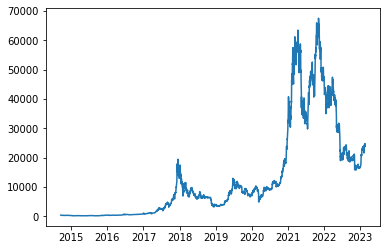

In [ ]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [ ]:
# TRain test split

to_row = int(len(df)*0.9)

training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])


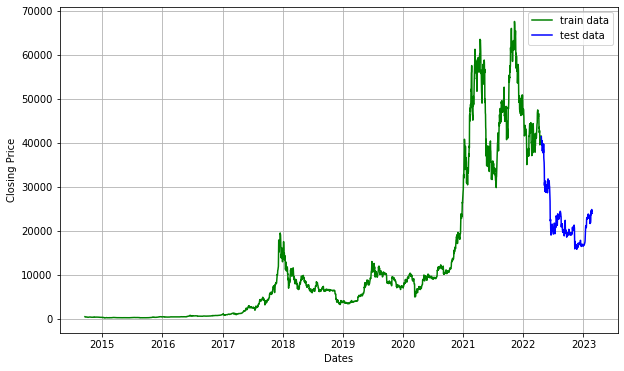

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(df[0:to_row]['Adj Close'], 'green', label = 'train data')
plt.plot(df[to_row:]['Adj Close'], 'blue', label = 'test data')
plt.legend()

In [ ]:
model_predictions = []
n_test_obser = len(testing_data)

In [ ]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order = (4,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3079
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -24915.883
Method:                       css-mle   S.D. of innovations            790.970
Date:                Thu, 23 Feb 2023   AIC                          49843.765
Time:                        21:22:17   BIC                          49879.959
Sample:                             1   HQIC                         49856.767
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7879     14.710      0.529      0.597     -21.044      36.619
ar.L1.D.y     -0.0256      0.018     -1.422      0.155      -0.061       0.010
ar.L2.D.y      0.0048      0.018      0.268      0.7

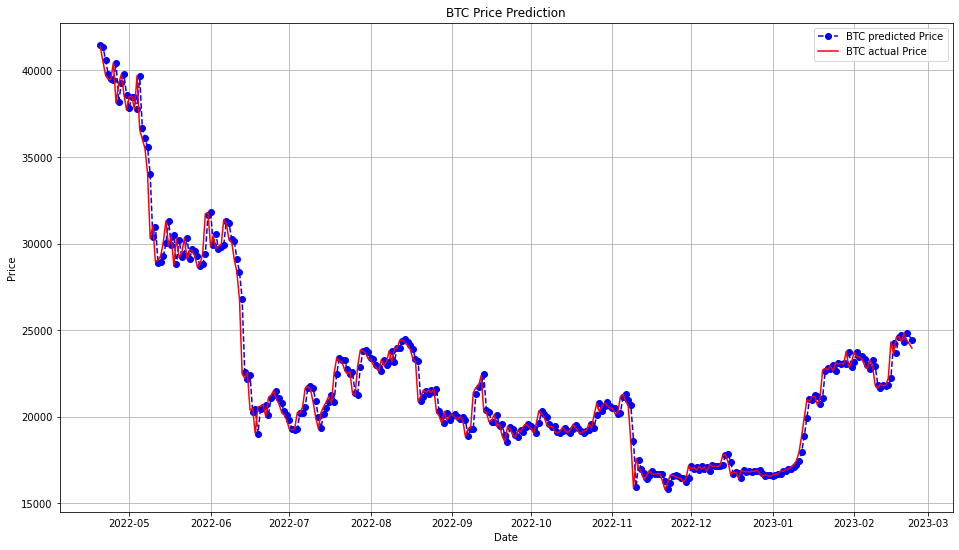

In [ ]:
plt.figure(figsize=(16,9))
plt.grid(True)

date_range = df[to_row:].index

plt.plot(date_range, model_predictions[:], color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC predicted Price')
plt.plot(date_range, testing_data, color = 'red', label = 'BTC actual Price')
plt.title('BTC Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



In [ ]:
mape = np.mean(np.abs(np.array(model_predictions[:]) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+ str(mape))

# Around 2.1% MAPE(Mean ABsolute Percentage Error) implies the model is about 97.7% accurate in predicting the test set observations

MAPE: 0.02167111140368153


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-18,24565.296875,24798.835938,24468.373047,24641.277344,24641.277344,19625427158
2023-02-19,24640.027344,25093.054688,24327.642578,24327.642578,24327.642578,25555105670
2023-02-20,24336.623047,25020.458984,23927.910156,24829.148438,24829.148438,28987376573
2023-02-21,24833.048828,25126.851562,24200.363281,24436.353516,24436.353516,31252098714
2023-02-23,24197.619141,24569.072266,23700.521484,23959.371094,23959.371094,30766503936


<AxesSubplot:>

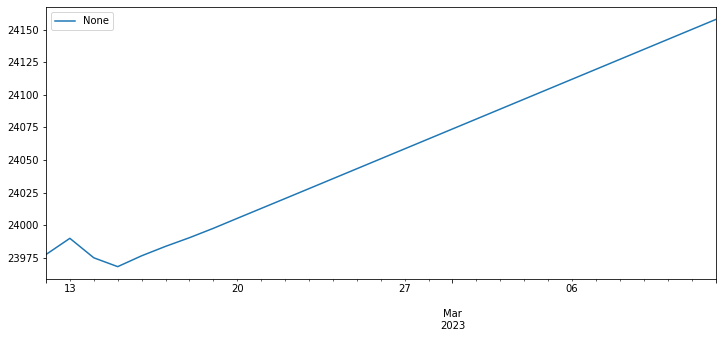

In [ ]:
model2 = ARIMA(df['Adj Close'], order = (4,1,0))
model2 = model2.fit()
index_future_dates = pd.date_range(start = '2023-02-12', end = '2023-03-12')
pred = model2.predict(start = len(df), end = len(df)+28, typ = 'levels')
pred.index = index_future_dates
pred.plot(figsize=(12,5), legend = True)


In [ ]:
print(pred)

2023-02-12    23977.463684
2023-02-13    23989.898652
2023-02-14    23974.965681
2023-02-15    23968.169156
2023-02-16    23976.488628
2023-02-17    23983.723916
2023-02-18    23990.363566
2023-02-19    23997.577919
2023-02-20    24005.227995
2023-02-21    24012.823402
2023-02-22    24020.415262
2023-02-23    24028.033927
2023-02-24    24035.664476
2023-02-25    24043.293057
2023-02-26    24050.922180
2023-02-27    24058.552365
2023-02-28    24066.182860
2023-03-01    24073.813300
2023-03-02    24081.443783
2023-03-03    24089.074303
2023-03-04    24096.704832
2023-03-05    24104.335360
2023-03-06    24111.965889
2023-03-07    24119.596421
2023-03-08    24127.226952
2023-03-09    24134.857483
2023-03-10    24142.488015
2023-03-11    24150.118546
2023-03-12    24157.749078
Freq: D, dtype: float64
